# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
import os
import random

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, InputLayer, GlobalAveragePooling2D
from tensorflow.keras.layers.experimental import preprocessing as pre

In [2]:
test_dir = r"../input/cat-and-dog/test_set/test_set"
train_dir = r"../input/cat-and-dog/training_set/training_set"

In [3]:
def define_y(X):
    arr = []
    k = 0
    for i in X:
        if "cat" == i.split("/")[-1][:3]:
            arr.append(0)
        elif "dog" == i.split("/")[-1][:3]:
            arr.append(1)
            
        k += 1
        
    return np.array(arr)

def define_dir(dir):
    del (dir[dir.index("_DS_Store")])

    for i in range(len(dir)):
        direct = train_dir+f"/{dir[i][:3]}s/"
        direct += dir[i]
        
        dir[i] = direct
        
def define_dir_test(dir):
    del (dir[dir.index("_DS_Store")])

    for i in range(len(dir)):
        direct = test_dir+f"/{dir[i][:3]}s/"
        direct += dir[i]
        
        dir[i] = direct

In [4]:
cats_dir = os.listdir(train_dir+r"/cats")
dogs_dir = os.listdir(train_dir+r"/dogs")

cats_test_dir = os.listdir(test_dir+r"/cats")
dogs_test_dir = os.listdir(test_dir+r"/dogs")

define_dir(cats_dir)
define_dir(dogs_dir)

define_dir_test(cats_test_dir)
define_dir_test(dogs_test_dir)

We will use 400 rows of dataset. It takes more time so, you can try use all rows on jupyter notebokk

In [5]:
X_train = np.array(cats_dir[:200]+dogs_dir[:200])

random.shuffle(X_train)

Y_train = define_y(X_train)

df = pd.DataFrame({
    "dir": X_train,
    "target": Y_train
})
df

,dir,target
0,../input/cat-and-dog/training_set/training_set...,1
1,../input/cat-and-dog/training_set/training_set...,1
2,../input/cat-and-dog/training_set/training_set...,1
3,../input/cat-and-dog/training_set/training_set...,1
4,../input/cat-and-dog/training_set/training_set...,1
...,...,...
395,../input/cat-and-dog/training_set/training_set...,1
396,../input/cat-and-dog/training_set/training_set...,1
397,../input/cat-and-dog/training_set/training_set...,1
398,../input/cat-and-dog/training_set/training_set...,0


In [6]:
X_test = np.array(cats_test_dir[:50]+dogs_test_dir[:50])

random.shuffle(X_test)

Y_test = define_y(X_test)

df_test = pd.DataFrame({
    "dir": X_test,
    "target": Y_test
})

df_test

,dir,target
0,../input/cat-and-dog/test_set/test_set/dogs/do...,1
1,../input/cat-and-dog/test_set/test_set/cats/ca...,0
2,../input/cat-and-dog/test_set/test_set/dogs/do...,1
3,../input/cat-and-dog/test_set/test_set/cats/ca...,0
4,../input/cat-and-dog/test_set/test_set/cats/ca...,0
...,...,...
95,../input/cat-and-dog/test_set/test_set/cats/ca...,0
96,../input/cat-and-dog/test_set/test_set/cats/ca...,0
97,../input/cat-and-dog/test_set/test_set/dogs/do...,1
98,../input/cat-and-dog/test_set/test_set/dogs/do...,1


And convert image to array, resizing this to 224x244

In [7]:
X_ = []

for i in range(len(df["dir"])):
    img = Image.open(df["dir"][i]).resize((224, 224))
    
    arr = np.reshape(list(img.getdata()), (224, 224, 3))
    
    X_.append(arr)

In [8]:
np.array(X_).shape

(400, 224, 224, 3)

In [9]:
X_train = np.array(X_)

In [10]:
X_ = []

for i in range(len(df_test["dir"])):
    img = Image.open(df_test["dir"][i]).resize((224, 224))
    
    arr = np.reshape(list(img.getdata()), (224, 224, 3))
    
    X_.append(arr)

In [11]:
X_test = np.array(X_)

Let's see first 5 images of train set

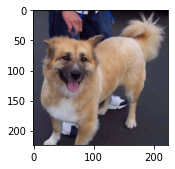

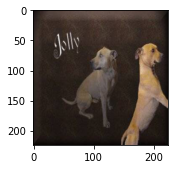

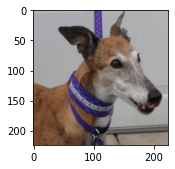

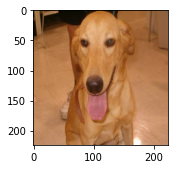

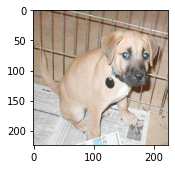

In [12]:
for i in range(5):
    plt.figure(figsize=(14, 9))
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])

# Modeling

We will use a pretrained model VGG16 as base

In [13]:
vgg = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False
)
vgg.trainable = False


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

58900480/58889256 [==============================] - 0s 0us/step


Don't forget to standartize a data

In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
model = keras.Sequential([
    pre.RandomFlip("horizontal"),
    pre.RandomContrast(0.5),
    vgg,
    GlobalAveragePooling2D(),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=["binary_accuracy"]
)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    min_delta=0.001,
    patience=2,
    restore_best_weights=True
)

In [17]:
hist = model.fit(X_train, Y_train, epochs=7, validation_data=(X_test, Y_test), callbacks=[early_stop])

2022-01-14 13:01:01.956984: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/7
13/13 [==============================] - 132s 10s/step - loss: 0.6771 - binary_accuracy: 0.5775 - val_loss: 0.6645 - val_binary_accuracy: 0.6100
Epoch 2/7
13/13 [==============================] - 129s 10s/step - loss: 0.6548 - binary_accuracy: 0.6250 - val_loss: 0.6371 - val_binary_accuracy: 0.7000
Epoch 3/7
13/13 [==============================] - 130s 10s/step - loss: 0.6379 - binary_accuracy: 0.6800 - val_loss: 0.5967 - val_binary_accuracy: 0.7800
Epoch 4/7
13/13 [==============================] - 130s 10s/step - loss: 0.5782 - binary_accuracy: 0.8350 - val_loss: 0.5491 - val_binary_accuracy: 0.8100
Epoch 5/7
13/13 [==============================] - 130s 10s/step - loss: 0.5373 - binary_accuracy: 0.8025 - val_loss: 0.5119 - val_binary_accuracy: 0.7900
Epoch 6/7
13/13 [==============================] - 129s 10s/step - loss: 0.4868 - binary_accuracy: 0.8175 - val_loss: 0.4547 - val_binary_accuracy: 0.8400
Epoch 7/7
13/13 [==============================] - 130s 10s/step - los

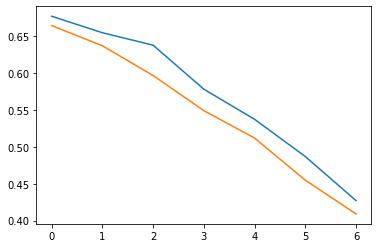

In [18]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Create a test predictions

In [19]:
test_preds = model.predict(X_test)

In [20]:
k = 0
    
for i in test_preds:
    if int(i[0] >= 0.5) != Y_test[k]:
        print(f"Predicted: {i}, Y: {Y_test[k]}, X_test index: {k}")
        
    k += 1

Predicted: [0.548521], Y: 0, X_test index: 4
Predicted: [0.4750276], Y: 1, X_test index: 11
Predicted: [0.5323019], Y: 0, X_test index: 15
Predicted: [0.6211125], Y: 0, X_test index: 24
Predicted: [0.6133113], Y: 0, X_test index: 26
Predicted: [0.45427033], Y: 1, X_test index: 53
Predicted: [0.48799157], Y: 1, X_test index: 56
Predicted: [0.8233372], Y: 0, X_test index: 60
Predicted: [0.35081542], Y: 1, X_test index: 70
Predicted: [0.5904653], Y: 0, X_test index: 75
Predicted: [0.6211262], Y: 0, X_test index: 77
Predicted: [0.45555988], Y: 1, X_test index: 84
Predicted: [0.4439701], Y: 1, X_test index: 89
Predicted: [0.69905657], Y: 0, X_test index: 96


array([0.548521], dtype=float32)

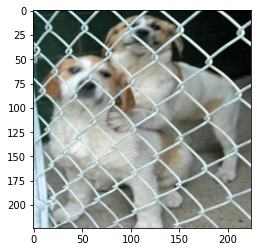

In [21]:
plt.imshow(X_test[7])
test_preds[4]